## PROJECT OVERVIEW
Malaria remains a major public health issue, particularly in tropical and subtropical regions. Timely prediction of malaria outbreaks is essential for efficient resource allocation, preventive intervention, and reducing mortality rates. This project aims to utilize historical malaria data—specifically from the World Health Organization (WHO)—to develop predictive models that forecast outbreak risks, detect high-risk periods and regions, and support public health decision-making.



## PROBLEM STATEMENT
Despite extensive global efforts, malaria outbreaks continue to occur unpredictably, especially in vulnerable regions. The limitations of current surveillance systems—including their reactive nature, inconsistent reporting, and lack of predictive capability that hinder timely interventions.
This project helps address:

1. The lack of forward-looking models to predict malaria risks.

2. Data quality challenges, including missing and inconsistent entries.

3. The urgent need for early warning tools to guide proactive public health responses.



## PROJECT OBJECTIVES

1. Examine malaria cases and deaths by country, year, and WHO region.

2. Identify seasonal patterns, anomalies, and persistent hotspots.
    
3. Develop predictive and forecast models.
    
4. Explore relationships between malaria incidence and climate, healthcare infrastructure, and population density.

5. Detect increasing or decreasing trends in specific regions.

6. Deliver actionable insights to help various authorities in decision making.

In [2]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
  Using cached pandas-2.3.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   -------------------------

In [5]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
    --------------------------------------- 0.3/10.7 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.7 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/10.7 MB 1.2 MB/s eta 0:00:09
   -- ------------------------------------- 0.8/10.7 MB 1.2 MB/s eta 0:00:09
   --- ------------------------------------ 1.0/10.7 MB 957.2 kB/s eta 0:00:11
   --- ------------------------------------ 1.0/10.7 MB 957.2 kB/s eta 0:00:11
   --- ------------------------------------ 1.0/10.7 MB 957.2 kB/s eta 0:00:11
   --- ------------------------------------ 1.0/10.7 MB 957.2 kB/s eta 0:00:11
   --- ------------------------------------ 1.0/10.7 MB 957.2 kB/s eta 0:00:11
   --- ---------

In [6]:
# Import necessary libraries
!pip install pandas matplotlib seaborn numpy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import mpl_toolkits
import statsmodels.api as sm
import calendar
import warnings 
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Defaulting to user installation because normal site-packages is not writeable


In [7]:
# loading data
df = pd.read_csv('reported_numbers.csv')
df.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe


In [8]:
#check data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        1944 non-null   object 
 1   Year           1944 non-null   int64  
 2   No. of cases   1710 non-null   float64
 3   No. of deaths  1675 non-null   float64
 4   WHO Region     1944 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 76.1+ KB


In [9]:
#statistical analysis
df.describe()

,Year,No. of cases,No. of deaths
count,1944.000000,1.710000e+03,1675.000000
mean,2008.500000,3.897303e+05,1289.413731
std,5.189462,1.270270e+06,4290.739997
min,2000.000000,0.000000e+00,0.000000
25%,2004.000000,5.937500e+02,1.000000
50%,2008.500000,1.479200e+04,30.000000
75%,2013.000000,1.170978e+05,669.500000
max,2017.000000,1.533084e+07,51842.000000


In [10]:
#no of rows and columns
df.shape

(1944, 5)

In [11]:
#column names
df.columns

Index(['Country', 'Year', 'No. of cases', 'No. of deaths', 'WHO Region'], dtype='object')

In [13]:
# Create a copy of the original data
cleaned_df = df.copy()

In [15]:
##  Handle Missing Data
cleaned_df['missing_key_fields'] = cleaned_df[['Country', 'Year', 'WHO Region']].isnull().any(axis=1)
cleaned_df = cleaned_df.dropna(subset=['Country', 'Year', 'WHO Region'])
    

In [16]:
# Impute missing numerical values (cases and deaths)
num_cols = ['No. of cases', 'No. of deaths']
mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')
cleaned_df[num_cols] = mean_imputer.fit_transform(cleaned_df[num_cols])

In [18]:
# Standardize country names- create a mapping for known inconsistencies
country_mapping = {
        'Côte d\'Ivoire': 'Ivory Coast',
        'Korea, Democratic People\'s Republic of': 'North Korea',
        'Korea, Republic of': 'South Korea',
        'Bolivia (Plurinational State of)': 'Bolivia',
        'Democratic Republic of the Congo': 'Congo',
        "Democratic People's Republic of Korea": 'Korea',
        'Iran (Islamic Republic of)': 'Iran',
        "Lao People's Democratic Republic": 'Lao',
        'Papua New Guinea': 'papua Guinea',
        'Sao Tome and Principe': 'Sao Tome',
        'Syrian Arab Republic': 'Syrian Arab',
        'United Arab Emirates': 'Arab Emirates',
        'United Republic of Tanzania': 'Tanzania',
        'Venezuela (Bolivarian Republic of)': 'Venezuela',
        'Republic of Korea': 'Korea',
        'Central African Republic': 'Central African'    
    }
cleaned_df['Country'] = cleaned_df['Country'].replace(country_mapping)
    

In [22]:
# Convert numerical fields to appropriate data types
cleaned_df['No. of cases'] = pd.to_numeric(cleaned_df['No. of cases'], errors='coerce')
cleaned_df['No. of deaths'] = pd.to_numeric(cleaned_df['No. of deaths'], errors='coerce')
cleaned_df['Year'] = pd.to_numeric(cleaned_df['Year'], errors='coerce').astype('Int64')
    

In [23]:
#Outlier Detection
# Calculate z-scores for numerical columns
for col in num_cols:
    col_zscore = col + '_zscore'
    cleaned_df[col_zscore] = (cleaned_df[col] - cleaned_df[col].mean()) / cleaned_df[col].std()

In [24]:
# Flag outliers (z-score > 3 or < -3)
cleaned_df['potential_outlier'] = (cleaned_df[[c + '_zscore' for c in num_cols]].abs() > 3).any(axis=1)
cleaned_df['potential_outlier']

0       False
1       False
2        True
3       False
4       False
        ...  
1939    False
1940    False
1941    False
1942    False
1943    False
Name: potential_outlier, Length: 1944, dtype: bool

#### No outliers detected!!!

In [25]:
#Feature Engineering
# Calculate case fatality rate (deaths/cases) with handling for zero cases
cleaned_df['Case fatality rate'] = np.where(
  cleaned_df['No. of cases'] > 0,
  cleaned_df['No. of deaths'] / cleaned_df['No. of cases'],
  np.nan
    )

In [26]:
#temporary column
if 'Year' in cleaned_df.columns:
        cleaned_df['Years_since_first_record'] = cleaned_df['Year'] - cleaned_df['Year'].min()
    

In [27]:
cleaned_df.head()

,Country,Year,No. of cases,No. of deaths,WHO Region,missing_key_fields,No. of cases_zscore,No. of deaths_zscore,potential_outlier,Case fatality rate,Years_since_first_record
0,Afghanistan,2017,161778.0,10.000000,Eastern Mediterranean,False,-0.191343,-0.321246,False,0.000062,17
1,Algeria,2017,0.0,0.000000,Africa,False,-0.327140,-0.323757,False,NaN,17
2,Angola,2017,3874892.0,13967.000000,Africa,False,2.925448,3.183194,True,0.003604,17
3,Argentina,2017,0.0,1.000000,Americas,False,-0.327140,-0.323506,False,NaN,17
4,Armenia,2017,0.0,1289.413731,Europe,False,-0.327140,0.000000,False,NaN,17


In [28]:
# One-hot encode the 'WHO Region' column with additional options.
    
#Parameters:
#cleaned_df (pd.DataFrame): Input dataframe containing 'WHO Region' column
#drop_original (bool): Whether to drop the original 'WHO Region' column after encoding
#handle_unknown (str): How to handle unknown categories ('ignore' or 'error')
    
# Returns:
#pd.DataFrame: Dataframe with WHO Region one-hot encoded
def encode_who_region(cleaned_df, drop_original=True, handle_unknown='ignore'):
    
    if 'WHO Region' not in cleaned_df.columns:
        print("Warning: 'WHO Region' column not found in dataframe")
        return cleaned_df
    
    # Initialize encoder with parameters
    encoder = OneHotEncoder(
        sparse_output=False,
        drop='first',  # Reduces multicollinearity
        handle_unknown=handle_unknown  # How to handle unseen categories
    )
    
    # Fit and transform the data
    encoded_regions = encoder.fit_transform(cleaned_df[['WHO Region']])
    
    # Create dataframe with proper column names and index alignment
    encoded_df = pd.DataFrame(
        encoded_regions,
        columns=encoder.get_feature_names_out(['WHO Region']),
        index=cleaned_df.index
    )
    
    # Concatenate with original dataframe
    result_df = pd.concat([cleaned_df, encoded_df], axis=1)
    
    # Optionally drop original column
    if drop_original:
        result_df = result_df.drop(columns=['WHO Region'])
    
    # Store the encoder for potential future use (optional)
    result_df.attrs['who_region_encoder'] = encoder
    
    return result_df

In [29]:
# Handle potential unknown categories in future data
cleaned_df = encode_who_region(cleaned_df, handle_unknown='ignore')

In [30]:
cleaned_df 

,Country,Year,No. of cases,No. of deaths,missing_key_fields,No. of cases_zscore,No. of deaths_zscore,potential_outlier,Case fatality rate,Years_since_first_record,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific
0,Afghanistan,2017,1.617780e+05,10.000000,False,-0.191343,-0.321246,False,0.000062,17,0.0,1.0,0.0,0.0,0.0
1,Algeria,2017,0.000000e+00,0.000000,False,-0.327140,-0.323757,False,NaN,17,0.0,0.0,0.0,0.0,0.0
2,Angola,2017,3.874892e+06,13967.000000,False,2.925448,3.183194,True,0.003604,17,0.0,0.0,0.0,0.0,0.0
3,Argentina,2017,0.000000e+00,1.000000,False,-0.327140,-0.323506,False,NaN,17,1.0,0.0,0.0,0.0,0.0
4,Armenia,2017,0.000000e+00,1289.413731,False,-0.327140,0.000000,False,NaN,17,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939,Venezuela,2000,2.973600e+04,24.000000,False,-0.302179,-0.317731,False,0.000807,0,1.0,0.0,0.0,0.0,0.0
1940,Viet Nam,2000,7.431600e+04,142.000000,False,-0.264759,-0.288102,False,0.001911,0,0.0,0.0,0.0,0.0,1.0
1941,Yemen,2000,1.394495e+06,1289.413731,False,0.843400,0.000000,False,0.000925,0,0.0,1.0,0.0,0.0,0.0
1942,Zambia,2000,3.897303e+05,1289.413731,False,0.000000,0.000000,False,0.003308,0,0.0,0.0,0.0,0.0,0.0


In [31]:
# Drop columns that are no longer needed after preprocessing.
    
#Parameters:
#df (pd.DataFrame): Cleaned dataframe from preprocessing
    
#Returns:
#pd.DataFrame: Dataframe with unnecessary columns removed
def drop_unnecessary_columns(df):
    
    columns_to_drop = [
        # Outlier detection columns
        'No. of cases_zscore', 'No. of deaths_zscore',
        'No. of cases_outlier', 'No. of deaths_outlier',
        
        # Temporary flags
        'missing_key_fields', 'potential_outlier',
        
    ]
    
    # Only drop columns that actually exist in the dataframe
    columns_to_drop = [col for col in columns_to_drop if col in df.columns]
    
    return df.drop(columns=columns_to_drop)


In [32]:
final_df = drop_unnecessary_columns(cleaned_df)
final_df

,Country,Year,No. of cases,No. of deaths,Case fatality rate,Years_since_first_record,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific
0,Afghanistan,2017,1.617780e+05,10.000000,0.000062,17,0.0,1.0,0.0,0.0,0.0
1,Algeria,2017,0.000000e+00,0.000000,NaN,17,0.0,0.0,0.0,0.0,0.0
2,Angola,2017,3.874892e+06,13967.000000,0.003604,17,0.0,0.0,0.0,0.0,0.0
3,Argentina,2017,0.000000e+00,1.000000,NaN,17,1.0,0.0,0.0,0.0,0.0
4,Armenia,2017,0.000000e+00,1289.413731,NaN,17,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1939,Venezuela,2000,2.973600e+04,24.000000,0.000807,0,1.0,0.0,0.0,0.0,0.0
1940,Viet Nam,2000,7.431600e+04,142.000000,0.001911,0,0.0,0.0,0.0,0.0,1.0
1941,Yemen,2000,1.394495e+06,1289.413731,0.000925,0,0.0,1.0,0.0,0.0,0.0
1942,Zambia,2000,3.897303e+05,1289.413731,0.003308,0,0.0,0.0,0.0,0.0,0.0


In [33]:
df1 = final_df
df1.head()

,Country,Year,No. of cases,No. of deaths,Case fatality rate,Years_since_first_record,WHO Region_Americas,WHO Region_Eastern Mediterranean,WHO Region_Europe,WHO Region_South-East Asia,WHO Region_Western Pacific
0,Afghanistan,2017,161778.0,10.000000,0.000062,17,0.0,1.0,0.0,0.0,0.0
1,Algeria,2017,0.0,0.000000,NaN,17,0.0,0.0,0.0,0.0,0.0
2,Angola,2017,3874892.0,13967.000000,0.003604,17,0.0,0.0,0.0,0.0,0.0
3,Argentina,2017,0.0,1.000000,NaN,17,1.0,0.0,0.0,0.0,0.0
4,Armenia,2017,0.0,1289.413731,NaN,17,0.0,0.0,1.0,0.0,0.0


In [44]:
# Recreating the 'WHO Region' column from one hot encoded columns
region_columns = [
    'WHO Region_Americas',
    'WHO Region_Eastern Mediterranean',
    'WHO Region_Europe',
    'WHO Region_South-East Asia',
    'WHO Region_Western Pacific'
]

# Maping the one hot encoded columns back to the original 'WHO Region' values
def get_region(row):
    for col in region_columns:
        if row[col] == 1:
            return col.replace('WHO Region_', '')
    return None

cleaned_df['WHO Region'] = cleaned_df.apply(get_region, axis=1)

# Verify the recreated column
print(cleaned_df[['WHO Region']].head())

              WHO Region
0  Eastern Mediterranean
1                   None
2                   None
3               Americas
4                 Europe


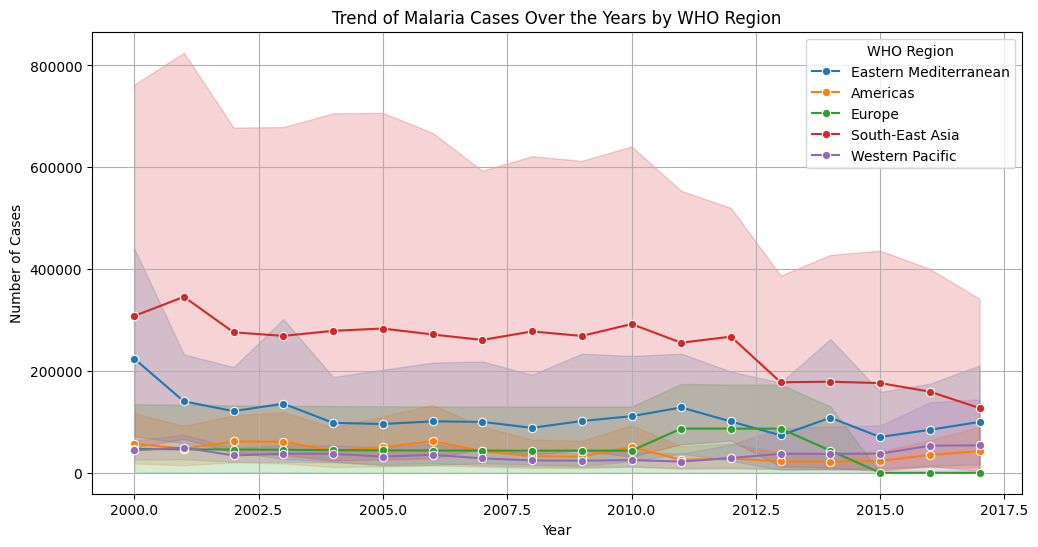

In [53]:
# lineplot code
plt.figure(figsize=(12, 6))
sns.lineplot(data=cleaned_df, x='Year', y='No. of cases', hue='WHO Region', marker='o')
plt.title('Trend of Malaria Cases Over the Years by WHO Region')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.legend(title='WHO Region')
plt.grid(True)
plt.show()

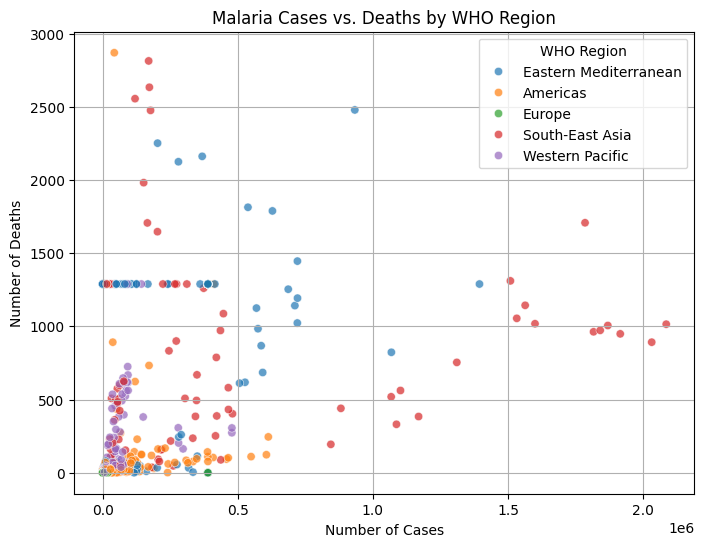

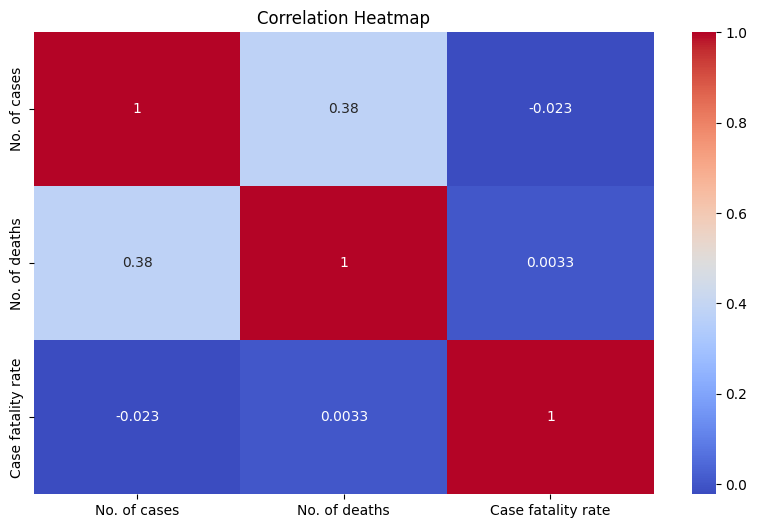

In [54]:
# Scatter plot: Malaria cases vs. deaths
plt.figure(figsize=(8, 6))
sns.scatterplot(data=cleaned_df, x='No. of cases', y='No. of deaths', hue='WHO Region', alpha=0.7)
plt.title('Malaria Cases vs. Deaths by WHO Region')
plt.xlabel('Number of Cases')
plt.ylabel('Number of Deaths')
plt.legend(title='WHO Region')
plt.grid(True)
plt.show()

# Heatmap: Correlation between numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(cleaned_df[['No. of cases', 'No. of deaths', 'Case fatality rate']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

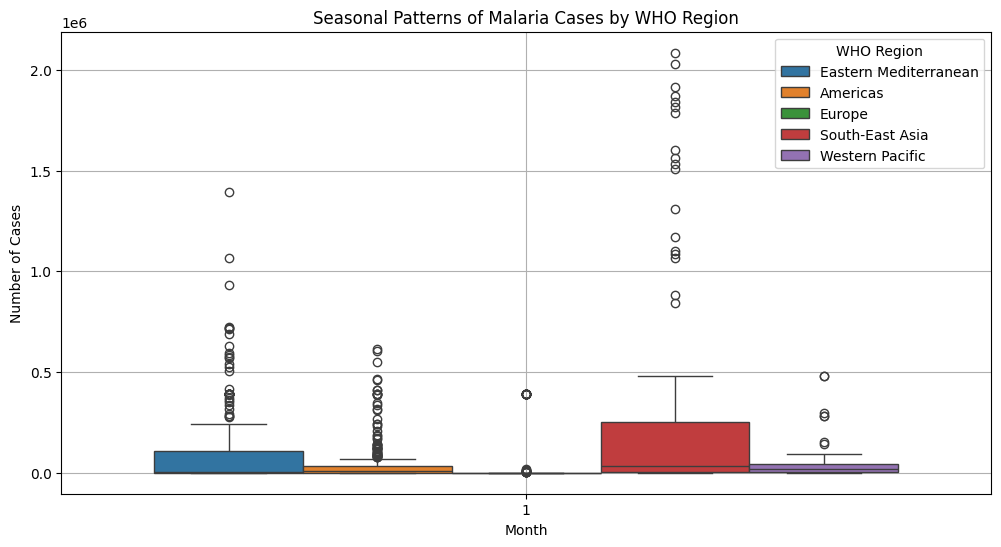

In [49]:
# Creating a 'Date' column using the 'Year' column
if 'Year' in cleaned_df.columns:
    cleaned_df['Date'] = pd.to_datetime(cleaned_df['Year'], format='%Y')

# Extract month from the 'Date' column
cleaned_df['Month'] = pd.to_datetime(cleaned_df['Date']).dt.month

# Plot seasonal patterns of malaria cases by WHO Region
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='Month', y='No. of cases', hue='WHO Region')
plt.title('Seasonal Patterns of Malaria Cases by WHO Region')
plt.xlabel('Month')
plt.ylabel('Number of Cases')
plt.legend(title='WHO Region')
plt.grid(True)
plt.show()